# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import datatime to convert from unix UTC time to readable time based on timezone
from datetime import datetime, timezone, timedelta

print(weather_api_key)

79b16ed188df002c353a4eb256c8fb74


### Generate the Cities List by Using the `citipy` Library

In [100]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [101]:
# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"{city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.fromtimestamp(city_weather["dt"], 
                                           tz=timezone.utc).astimezone(
                                               timezone(timedelta(seconds=city_weather["timezone"]))).strftime(
                                                   '%d-%m-%Y') 
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | pico truncado
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | linxia chengguanzhen
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | saint-pierre
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | fortaleza
Processing Record 20 of Set 1 | fannuj
City not found. Skipping...
Processing Record 21 of Set 1 | lat

In [102]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [103]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,244.71,97,9,2.53,RU,04-02-2025
1,grytviken,-54.2811,-36.5092,278.83,93,100,2.92,GS,03-02-2025
2,jamestown,42.0970,-79.2353,281.95,76,75,5.14,US,03-02-2025
3,pico truncado,-46.7949,-67.9573,292.01,15,39,6.89,AR,03-02-2025
4,blackmans bay,-43.0167,147.3167,295.22,69,77,2.61,AU,04-02-2025


In [104]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [105]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,244.71,97,9,2.53,RU,04-02-2025
1,grytviken,-54.2811,-36.5092,278.83,93,100,2.92,GS,03-02-2025
2,jamestown,42.0970,-79.2353,281.95,76,75,5.14,US,03-02-2025
3,pico truncado,-46.7949,-67.9573,292.01,15,39,6.89,AR,03-02-2025
4,blackmans bay,-43.0167,147.3167,295.22,69,77,2.61,AU,04-02-2025


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

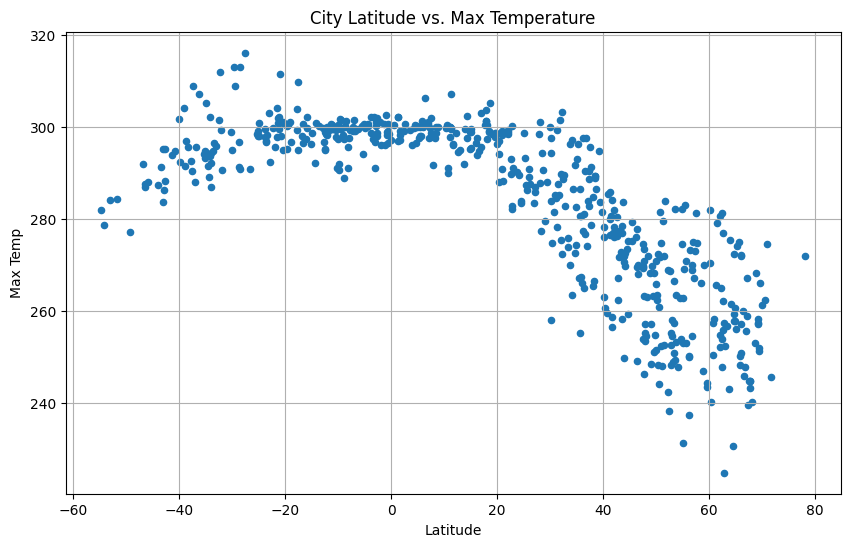

In [106]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", 
                       title="City Latitude vs. Max Temperature", grid=True, figsize=(10,6))

# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

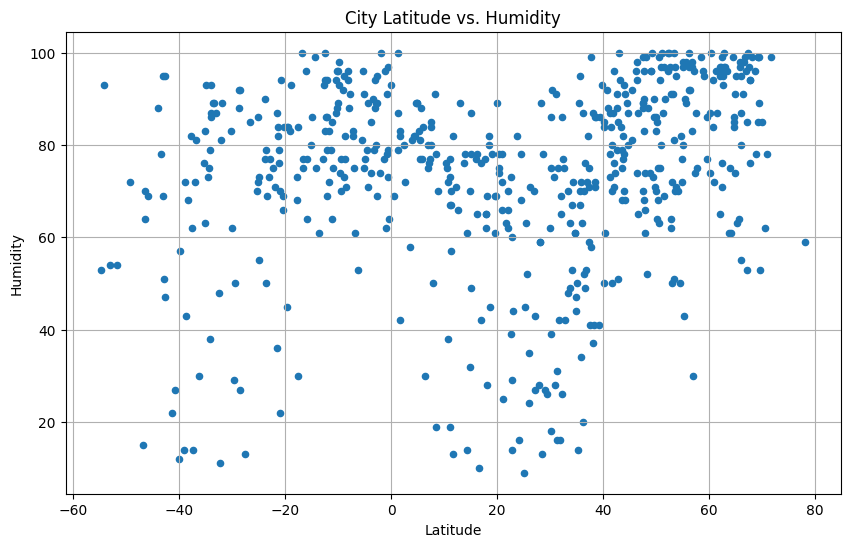

In [107]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity", grid=True, figsize=(10,6))


# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

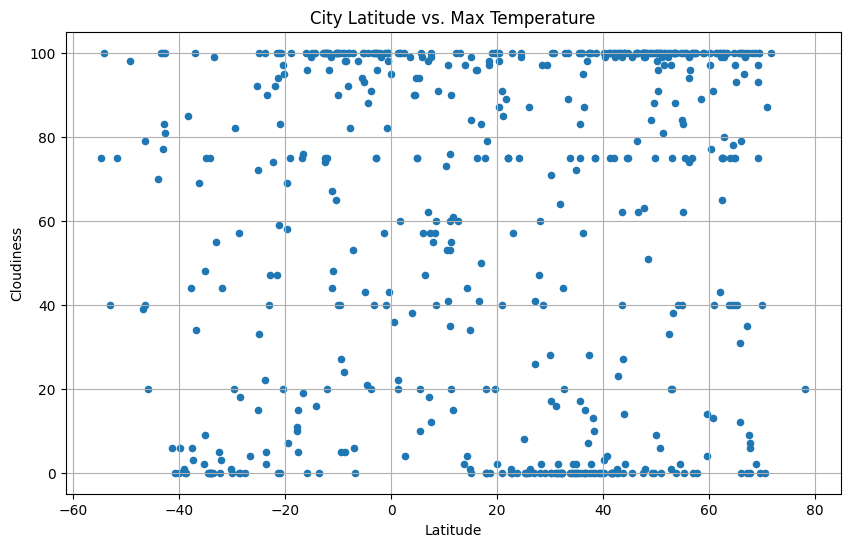

In [108]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
                       title="City Latitude vs. Max Temperature", grid=True, figsize=(10,6))


# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

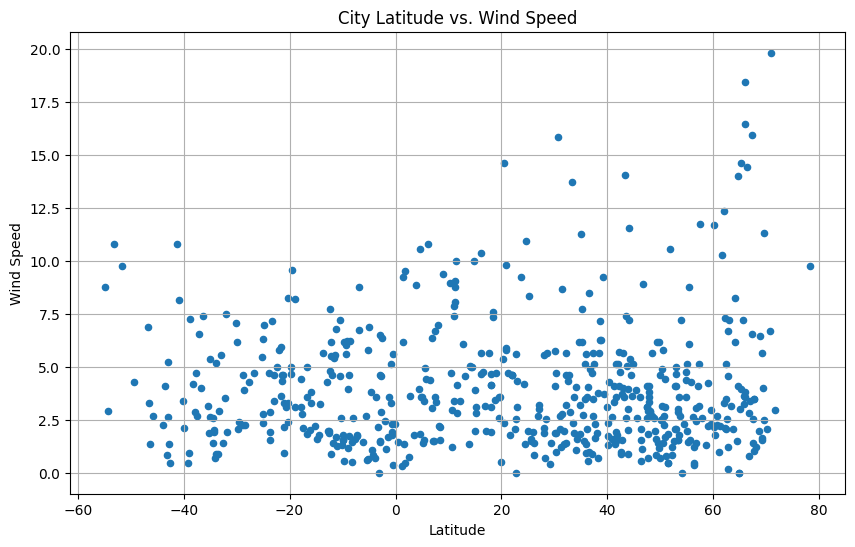

In [109]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
                       title="City Latitude vs. Wind Speed", grid=True, figsize=(10,6))

# Incorporate the other graph properties
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [110]:
# Define a function to create Linear Regression plots
def lin_regress(x_values, slope, intercept):
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return {"regress_values": regress_values, "line_eq": line_eq}

In [111]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,244.71,97,9,2.53,RU,04-02-2025
2,jamestown,42.0970,-79.2353,281.95,76,75,5.14,US,03-02-2025
5,linxia chengguanzhen,35.6003,103.2064,255.22,95,17,1.48,CN,04-02-2025
6,albany,42.6001,-73.9662,276.28,79,100,0.89,US,03-02-2025
7,bethel,41.3712,-73.4140,279.94,78,100,1.34,US,03-02-2025


In [112]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,278.83,93,100,2.92,GS,03-02-2025
3,pico truncado,-46.7949,-67.9573,292.01,15,39,6.89,AR,03-02-2025
4,blackmans bay,-43.0167,147.3167,295.22,69,77,2.61,AU,04-02-2025
9,invercargill,-46.4000,168.3500,287.60,70,40,1.34,NZ,04-02-2025
12,saint-pierre,-21.3393,55.4781,301.97,84,0,4.63,RE,04-02-2025


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.6844290916528774


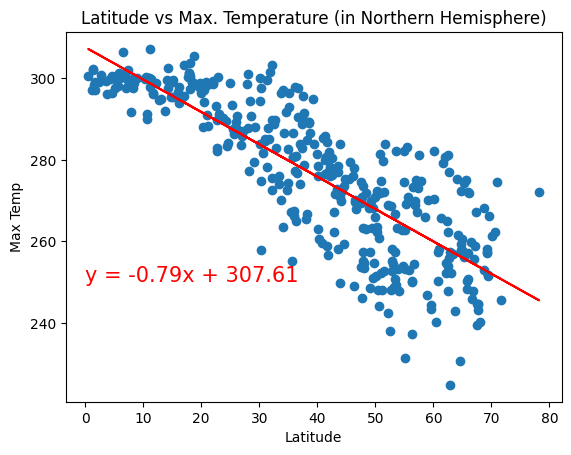

In [130]:
# Linear regression on Northern Hemisphere
north_latitude = northern_hemi_df['Lat']
north_max_temp = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_max_temp)
north_temp_regress = lin_regress(north_latitude, slope, intercept)

# Scatterplot creation
plt.scatter(north_latitude, north_max_temp)
plt.plot(north_latitude, north_temp_regress["regress_values"] ,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(north_temp_regress["line_eq"],(20,250),(0,250),fontsize=15,color="red")
plt.title(f"Latitude vs Max. Temperature (in Northern Hemisphere)")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.18130357391796736


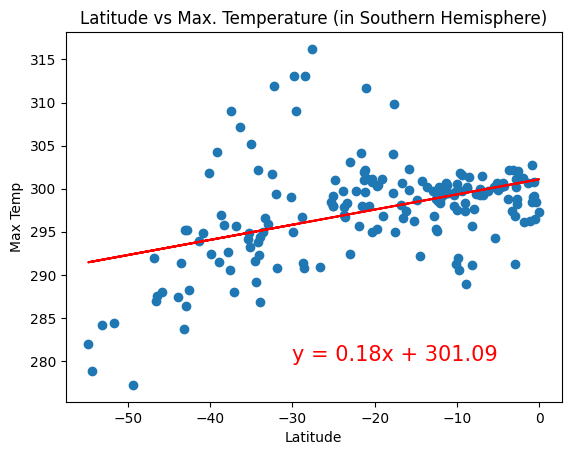

In [131]:
# Linear regression on Southern Hemisphere
south_latitude = southern_hemi_df['Lat']
south_max_temp = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_max_temp)
south_temp_regress = lin_regress(south_latitude, slope, intercept)

plt.scatter(south_latitude, south_max_temp)
plt.plot(south_latitude, south_temp_regress["regress_values"] ,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(south_temp_regress["line_eq"],(-30,285),(-30,280),fontsize=15,color="red")
plt.title(f"Latitude vs Max. Temperature (in Southern Hemisphere)")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

(-3.350965, 82.102865) (4.45, 104.55)
The r^2-value is: 0.13553164004660673


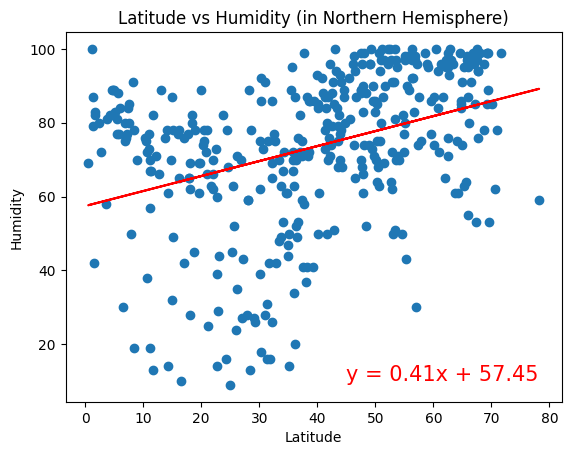

In [115]:
# Linear regression on Northern Hemisphere
north_humidity = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_humidity)
north_humidity_regress = lin_regress(north_latitude, slope, intercept)

# Scatterplot creation
plt.scatter(north_latitude, north_humidity)
plt.plot(north_latitude, north_humidity_regress["regress_values"] ,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(north_humidity_regress["line_eq"],(0,90),(45,10),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity (in Northern Hemisphere)")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

plt.show()

(-57.538335, 2.705035) (6.55, 104.45)
The r^2-value is: 0.16622864281078029


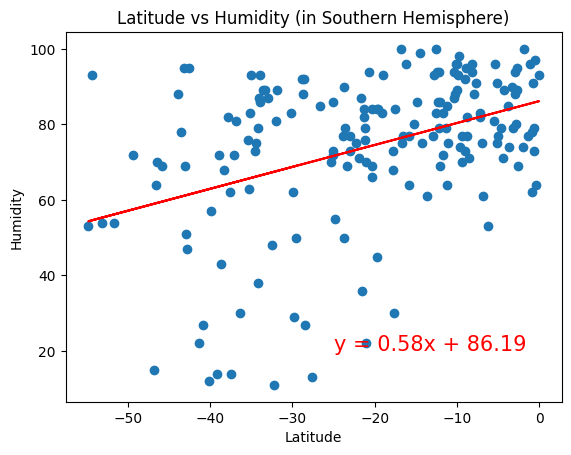

In [116]:
# Southern Hemisphere
south_humidity = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_humidity)
south_humidity_regress = lin_regress(south_latitude, slope, intercept)

# NOTE - Scatterplot creation
plt.scatter(south_latitude, south_humidity)
plt.plot(south_latitude, south_humidity_regress["regress_values"] ,"r-")
print(plt.xlim(), plt.ylim())

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(south_humidity_regress["line_eq"],(-25, 60),(-25,20),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity (in Southern Hemisphere)")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

(-3.350965, 82.102865) (-5.0, 105.0)
The r^2-value is: 0.019829844933728087


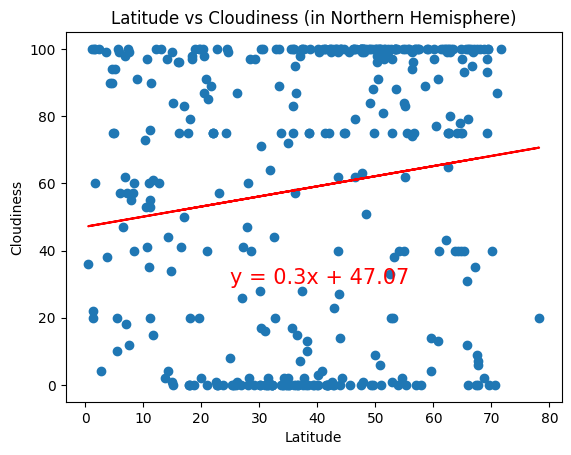

In [132]:
# Northern Hemisphere
north_cloudiness = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_cloudiness)
north_cloud_regress = lin_regress(north_latitude, slope, intercept)

# Scatterplot creation
plt.scatter(north_latitude, north_cloudiness)
plt.plot(north_latitude, north_cloud_regress["regress_values"] ,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(north_cloud_regress["line_eq"],(-3.35, 82.10),(25,30),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness (in Northern Hemisphere)")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

plt.show()

The r^2-value is: 0.11797878226646921


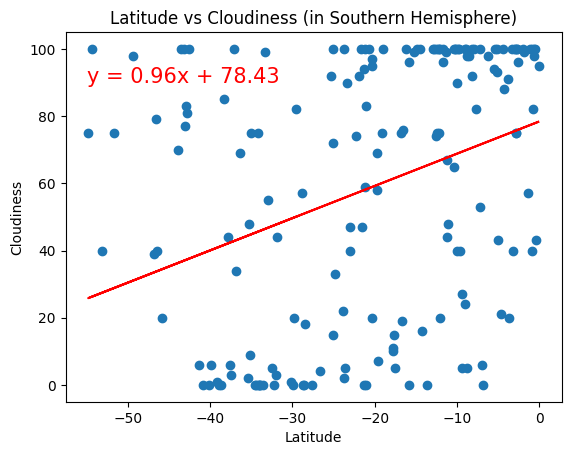

In [134]:
# Southern Hemisphere
south_cloudiness = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_cloudiness)
south_cloud_regress = lin_regress(south_latitude, slope, intercept)

# NOTE - Scatterplot creation
plt.scatter(south_latitude, south_cloudiness)
plt.plot(south_latitude, south_cloud_regress["regress_values"] ,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(south_cloud_regress["line_eq"],(-30,80),(-55,90),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness (in Southern Hemisphere)")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

(-3.350965, 82.102865) (-0.992, 20.832)
y = -0.0x + 4.12
The r^2-value is: 7.454969015832538e-06


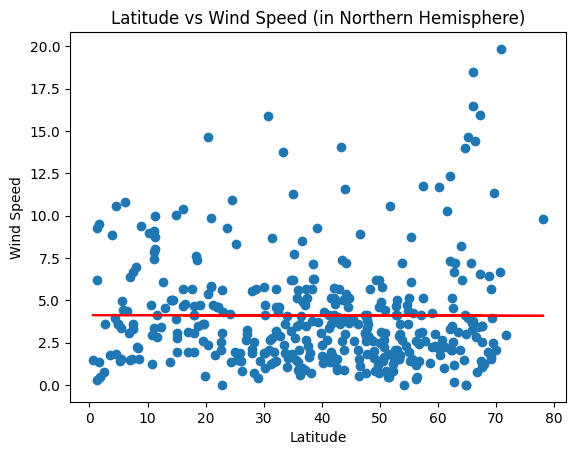

In [186]:
# Northern Hemisphere
north_wind = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_wind)
north_wind_regress = lin_regress(north_latitude, slope, intercept)

# Scatterplot creation
plt.scatter(north_latitude, north_wind)
plt.plot(north_latitude, north_wind_regress["regress_values"] ,"r-")
print(plt.xlim(), plt.ylim())
print(north_wind_regress["line_eq"])
# print(north_wind_regress["regress_values"])

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(north_wind_regress["line_eq"],(-3.35, 82.10), xytext=(5, 17.5), fontsize=8, color="purple")
plt.title(f"Latitude vs Wind Speed (in Northern Hemisphere)")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

plt.show()

(-57.538335, 2.705035) (-0.5405000000000001, 11.3505)
y = -0.03x + 3.07
The r^2-value is: 0.03203527420588281


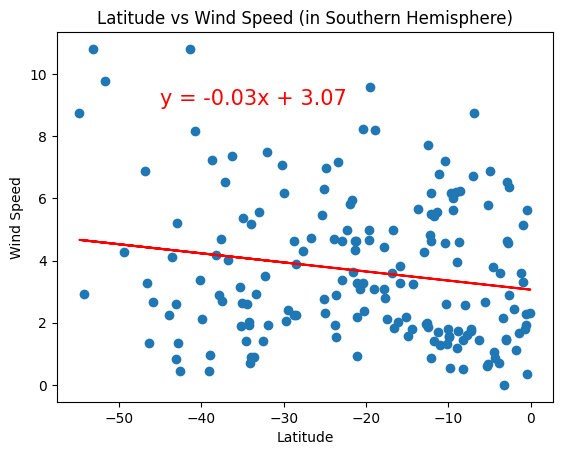

In [184]:
# Southern Hemisphere
south_wind = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_wind)
south_wind_regress = lin_regress(south_latitude, slope, intercept)

# NOTE - Scatterplot creation
plt.scatter(south_latitude, south_wind)
plt.plot(south_latitude, south_wind_regress["regress_values"] ,"r-")
print(plt.xlim(), plt.ylim())
print(south_wind_regress["line_eq"])
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(south_wind_regress["line_eq"],(-57.5, 5),(-45, 9),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed (in Southern Hemisphere)")

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE